In [13]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import speckle_stuffs as spkstf
import pickle
import scipy
import os
import pandas as pd
import seaborn as sns
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
rootff = ''
root_folder = rootff+'/138602451335454/' # missing a 10ms dataset. must add it and delete these
datas = [       
    [root_folder+'data_08102019_001_138602451335454_1169970955381759.pickle', 10],
    [root_folder+'data_08102019_002_138602451335454_1321903118749878.pickle', 50],
    [root_folder+'data_08102019_003_138602451335454_960136893984894.pickle', 100],
    [root_folder+'data_08102019_004_138602451335454_1481253755509509.pickle', 200],
    [root_folder+'data_08102019_005_138602451335454_727862202271457.pickle', 400],
    [root_folder+'data_08102019_006_138602451335454_1313535972910515.pickle', 10],
    [root_folder+'data_08102019_007_138602451335454_371631594409792.pickle', 50],
    [root_folder+'data_08102019_008_138602451335454_868751424891853.pickle', 100],
    [root_folder+'data_08102019_009_138602451335454_703486254832204.pickle', 200],
    [root_folder+'data_08102019_010_138602451335454_1511031000051726.pickle', 400],
    [root_folder+'data_09102019_001_138602451335454_569165452414563.pickle', 100],
    [root_folder+'data_09102019_002_138602451335454_118286091383591.pickle', 200],
    [root_folder+'data_09102019_003_138602451335454_1489691734404818.pickle', 400],
    [root_folder+'data_09102019_004_138602451335454_860237485152227.pickle', 50],
    [root_folder+'data_09102019_005_138602451335454_97408638229645.pickle', 10],
    [root_folder+'data_17102019_001_138602451335454_852804856902497.pickle', 10],
    [root_folder+'data_17102019_002_138602451335454_186964238206791.pickle', 30],
    [root_folder+'data_17102019_003_138602451335454_1276133103064011.pickle', 5],
    [root_folder+'data_17102019_004_138602451335454_581492886695683.pickle', 50],
    [root_folder+'data_17102019_005_138602451335454_305304046257999.pickle', 30],
    [root_folder+'data_17102019_006_138602451335454_39719868356339.pickle', 10],
    [root_folder+'data_17102019_007_138602451335454_377994519229193.pickle', 30],
    [root_folder+'data_17102019_008_138602451335454_991160979380852.pickle', 50],
    [root_folder+'data_17102019_009_138602451335454_847686205208697.pickle', 5],
    [root_folder+'data_17102019_010_138602451335454_127623816703061.pickle', 5],
    [root_folder+'data_17102019_011_138602451335454_636478001521471.pickle', 30],
    [root_folder+'data_17102019_012_138602451335454_674613561463294.pickle', 50],
    [root_folder+'data_17102019_013_138602451335454_1258966719080540.pickle', 10],
    [root_folder+'data_18102019_001_138602451335454_286280299871190.pickle', 10],
    [root_folder+'data_18102019_002_138602451335454_193021631601171.pickle', 50],
    [root_folder+'data_18102019_003_138602451335454_1260614952293101.pickle', 30],
    [root_folder+'data_18102019_004_138602451335454_143353481683699.pickle', 5]
]

In [1]:
###### gruop the barplots, of find a way to use diferent datasets (eventyally, do that manually in inkscape)
ccmethod = 'zncc'
datas.sort(key=lambda x:x[1])
df = pd.DataFrame(columns=['dataset','exposure','couplings'])


for picklesource, exposure in datas:
    filehandler = open(picklesource, 'rb')
    [extr_traces, extr_footprints, dpars] = pickle.load(filehandler)
    filehandler.close()
    gt = rootff+picklesource.split('/')[-1].split('_')[1] + os.sep+ '_'.join((picklesource.split('/')[-1]).split('_')[:3])+'_gt.mat'                     
    grtrh_traces = spkstf.extract_traces_from_mat(gt)
    grtrh_traces_cut = grtrh_traces[:,dpars['gt_frame_start']:dpars['gt_frame_start']+dpars['frames_no']]
    try:
        couplings = np.array(spkstf.find_trace_couplings(grtrh_traces, extr_traces, method=ccmethod))
    except IndexError:
        print('error on :'+picklesource)
        
    # populate the dataframe
    for cc in couplings[:,2]:
        df = df.append({
            'dataset':':'.join(picklesource.split('_')[1:2]),
            'exposure':exposure,
            'couplings':cc
        }, ignore_index=True)

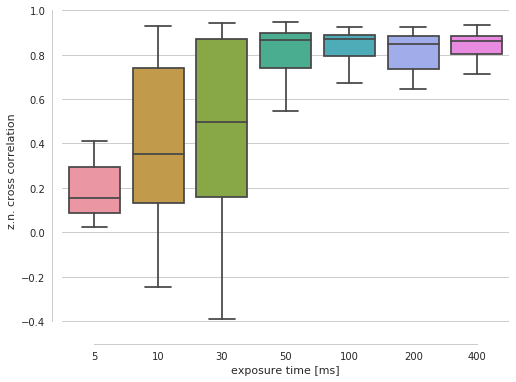

In [9]:
fig = plt.figure(figsize=(8,4))

sns.set(style="whitegrid", palette="colorblind")

tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
ax = sns.boxplot(x="exposure", y="couplings", data=df,
#             hue="dataset",
            showfliers=False)
sns.despine(offset=10, trim=True)

plt.xlabel('exposure time [ms]')
if ccmethod=='zncc':
    plt.ylabel('z.n. cross correlation')
elif ccmethod=='pcc':
    plt.ylabel('pearson cross correlation')
plt.show()
fig.savefig(rootff+'neurons_SNR_'+ccmethod+'.pdf', transparent=True, dpi=1200)